In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('C:\\Users\\cucum\\Tangkwa\\SR')

### Lasso for cat mech

In [3]:
df = pd.read_csv('bgg_forLasso.csv',index_col=[0])

df_dropname_and_target = df.drop(columns=['name','rating','Own'])
df_feature = df_dropname_and_target.copy()
df_feature

x = df_feature.values
y = df['rating'].to_numpy()

In [4]:
df_feature.columns.values

array(['Abstract Strategy', 'Action / Dexterity', 'Adventure',
       'Age of Reason', 'American Civil War', 'American Indian Wars',
       'American Revolutionary War', 'American West', 'Ancient',
       'Animals', 'Arabian', 'Aviation / Flight', 'Bluffing', 'Book',
       'Card Game', "Children's Game", 'City Building', 'Civil War',
       'Civilization', 'Collectible Components', 'Comic Book / Strip',
       'Deduction', 'Dice', 'Economic', 'Educational', 'Electronic',
       'Environmental', 'Expansion for Base-game', 'Exploration',
       'Fan Expansion', 'Fantasy', 'Farming', 'Fighting', 'Game System',
       'Horror', 'Humor', 'Industry / Manufacturing', 'Korean War',
       'Mafia', 'Math', 'Mature / Adult', 'Maze', 'Medical', 'Medieval',
       'Memory', 'Miniatures', 'Modern Warfare',
       'Movies / TV / Radio theme', 'Murder/Mystery', 'Music',
       'Mythology', 'Napoleonic', 'Nautical', 'Negotiation',
       'Novel-based', 'Number', 'Party Game', 'Pike and Shot', 'Pirate

In [5]:
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [6]:
# define model
model = Lasso(alpha=0.001)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = np.absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.285 (0.016)


In [7]:
listcatmech = df_feature.columns.values

In [8]:
model.fit(x,y)

Lasso(alpha=0.001)

In [9]:
df_catmechscore = pd.DataFrame(data =  model.coef_,
                 index = listcatmech,
                 columns = ['score'])

df_catmechscore.sort_values('score')

,score
Roll / Spin and Move,-0.179740
Bluffing,-0.108113
Re-rolling and Locking,-0.103122
Player Elimination,-0.100971
Maze,-0.100706
...,...
Scenario / Mission / Campaign Game,0.171228
Wargame,0.173708
Card Play Conflict Resolution,0.185158
Deck Construction,0.240236


In [10]:
df_catmechscore_sort = df_catmechscore.sort_values('score')

In [11]:
df_filter = df_catmechscore_sort[df_catmechscore_sort['score']!=0]
df_filter_positive = df_filter[df_filter['score']>0]
df_filter_negative = df_filter[df_filter['score']<0]

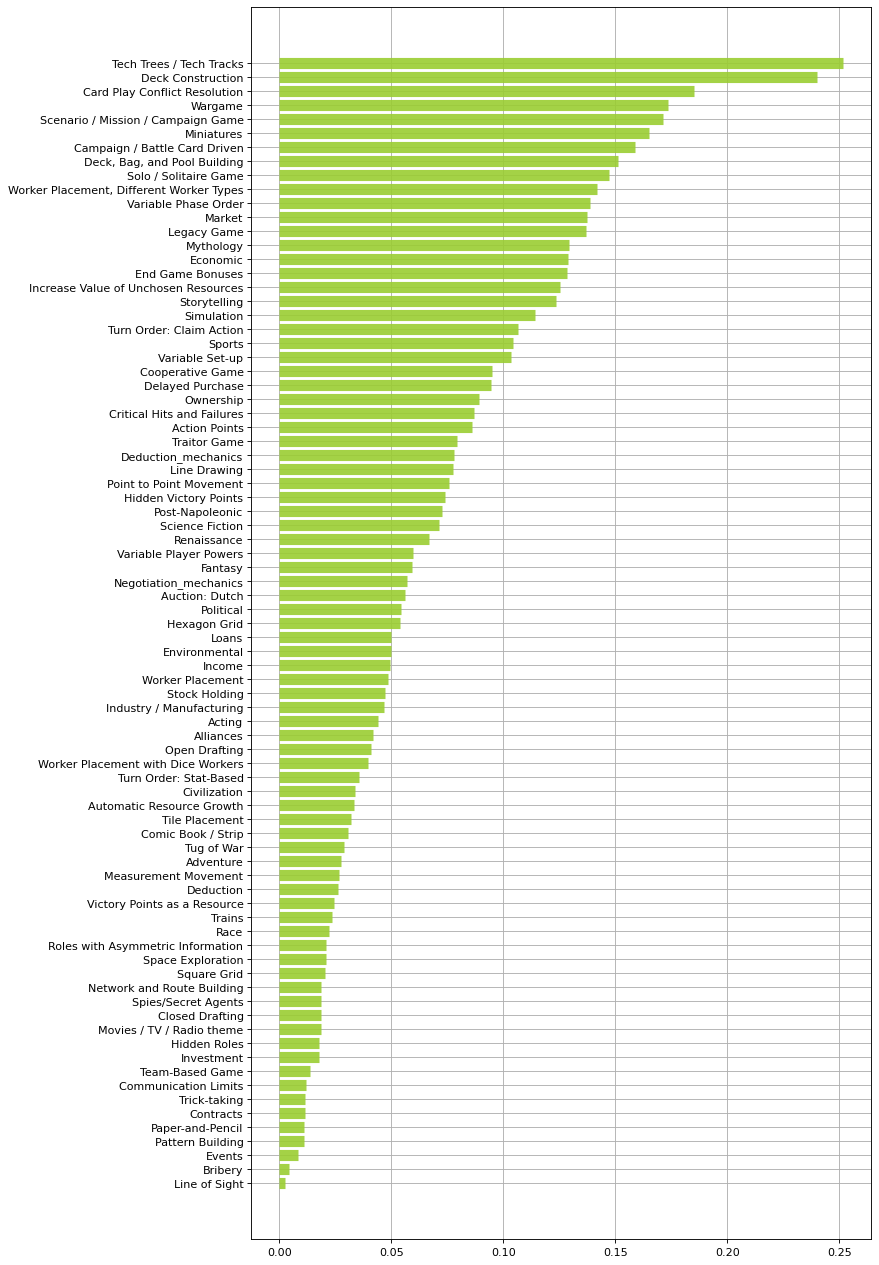

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 20), dpi=80)

plt.hlines(y=df_filter_positive.index.values, xmin=0, xmax=df_filter_positive['score'],
            alpha=0.9, linewidth=10, color = 'yellowgreen')
plt.grid()
plt.show()

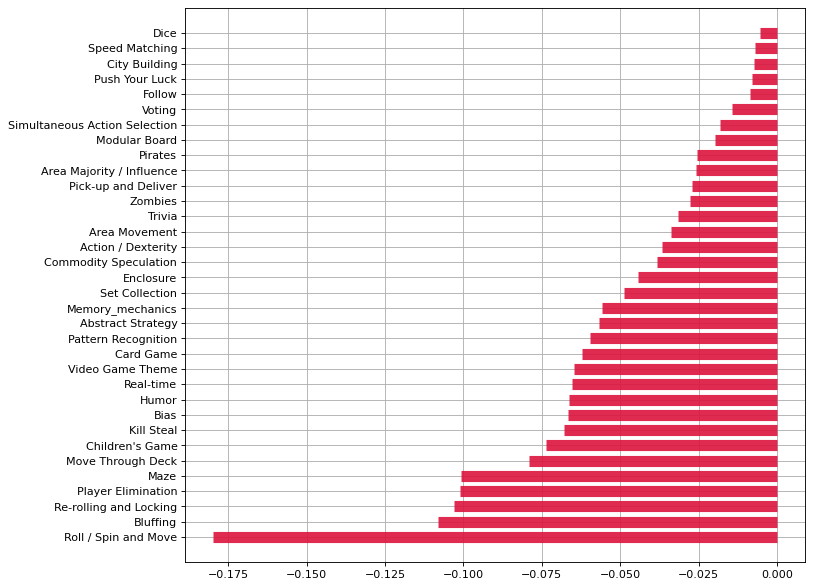

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 9), dpi=80)

plt.hlines(y=df_filter_negative.index.values, xmin=0, xmax=df_filter_negative['score'],
            alpha=0.9, linewidth=10, color = 'crimson')
plt.grid()
plt.show()

In [14]:
df = pd.read_csv('bgg_forLasso.csv',index_col=[0])

df_dropname_and_target = df.drop(columns=['name','rating','Own'])
df_feature = df_dropname_and_target.copy()

listcat = list(df_feature.columns.values[:84])

x = df[listcat].values
y = df['rating'].to_numpy()

model = Lasso(alpha=0.0005)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.321 (0.015)


In [15]:
# fit model
model.fit(x, y)
row = x[0]
yhat = model.predict([row])

print('Predicted: %.3f' % yhat)

Predicted: 7.713


In [16]:
df_catscore = pd.DataFrame(data =  model.coef_,
                 index = listcat,
                 columns = ['score'])

df_catscore.sort_values('score')

,score
Maze,-0.226719
Trivia,-0.200597
Bluffing,-0.192984
Children's Game,-0.156197
Abstract Strategy,-0.138785
...,...
Economic,0.170632
Post-Napoleonic,0.199052
Miniatures,0.223001
Wargame,0.226567


In [17]:
df = pd.read_csv('bgg_forLasso.csv',index_col=[0])

df_dropname_and_target = df.drop(columns=['name','rating','Own'])
df_feature = df_dropname_and_target.copy()

listmech = list(df_feature.columns.values[84:])

x = df[listmech].values
y = df['rating'].to_numpy()

model = Lasso(alpha=0.0005)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)

print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.291 (0.017)


In [18]:
# fit model
model.fit(x, y)
row = x[0]
yhat = model.predict([row])

print('Predicted: %.3f' % yhat)

Predicted: 9.089


In [19]:
df_mechscore = pd.DataFrame(data = model.coef_,
                 index = listmech,
                 columns = ['score'])

df_mechscore.sort_values('score')

,score
Speed Matching,-0.278412
Roll / Spin and Move,-0.197977
Re-rolling and Locking,-0.178945
Move Through Deck,-0.170536
Kill Steal,-0.157105
...,...
Deck Construction,0.236962
Card Play Conflict Resolution,0.264809
Tags,0.294737
Measurement Movement,0.305206


## Lasso for all feature

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('all_feature.csv')
df_dropname_and_target = df.drop(columns=['id','name','rank','rating','Own'])
df_feature = df_dropname_and_target.copy()

In [22]:
df_feature

,year,weight,min age,min player,max player,min playtime,max playtime,Abstract Strategy,Action / Dexterity,Adventure,...,gameboard,thought,vessels,suffer,elemental,vile,mother,historic,latest,len
0,2017,3.888937,14,1,4,60,120,0,0,1,...,0,0,0,0,0,0,0,0,0,268
1,2018,3.898923,14,2,4,60,120,0,0,0,...,0,0,0,0,0,0,0,0,0,473
2,2015,2.832344,12,2,4,60,60,0,0,0,...,0,0,0,0,0,0,0,0,0,330
3,2021,3.714385,12,1,4,90,150,0,0,0,...,0,0,0,0,0,0,0,0,0,196
4,2017,4.295896,14,3,6,240,480,0,0,0,...,0,0,0,0,0,0,0,0,0,439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1947,1.796992,8,2,2,20,20,0,1,0,...,0,0,0,0,0,0,0,0,0,144
1996,2017,1.053571,8,3,8,15,15,0,0,0,...,0,0,0,0,0,0,0,0,0,158
1997,2016,2.791667,12,1,4,60,90,0,0,0,...,0,0,0,1,0,0,0,0,0,406
1998,2018,3.333333,10,1,4,60,120,0,0,1,...,0,0,0,0,0,0,0,0,0,274


In [23]:
df_feature = df_feature.drop(columns=['ups'])

In [24]:
x = df_feature.values
y = df['rating'].to_numpy()

## Mean R2

In [25]:
import numpy as np
# define model
model = Lasso(alpha=0.001)
model.fit(x, y)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1)

print('Mean R2 : %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean R2 : 0.395 (0.109)


In [26]:
model.fit(x, y)

listvar = df_feature.columns.values
df_score = pd.DataFrame(data =  model.coef_,
                 index = listvar,
                 columns = ['score'])

df_score_sort = df_score.sort_values('score',ascending=True)
df_score_sort

,score
faster,-0.135580
officer,-0.096002
met,-0.095377
boardgame,-0.082122
rid,-0.080340
...,...
Scenario / Mission / Campaign Game,0.144556
content,0.174370
Miniatures,0.185338
Card Play Conflict Resolution,0.204370


In [27]:
df_filter = df_score_sort[df_score_sort['score']!=0]
df_filter_positive = df_filter[df_filter['score']>0]
df_filter_negative = df_filter[df_filter['score']<0]

In [28]:
df_filter_negative

,score
faster,-0.135580
officer,-0.096002
met,-0.095377
boardgame,-0.082122
rid,-0.080340
...,...
demand,-0.000474
earning,-0.000411
min playtime,-0.000339
len,-0.000130


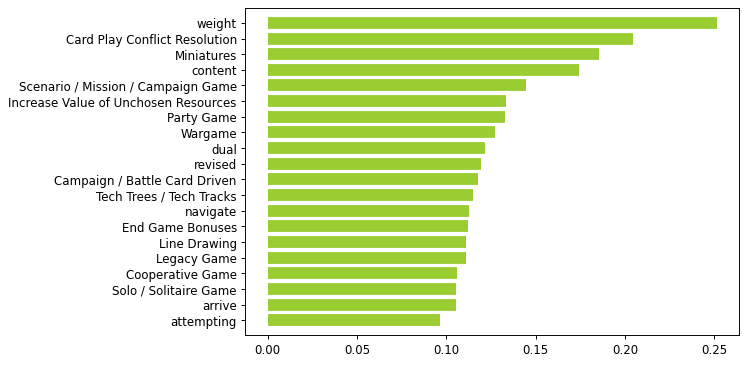

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 5), dpi=85)

plt.hlines(y=df_filter_positive.index.values[-20:], xmin=0, xmax=df_filter_positive['score'][-20:],
            alpha=1, linewidth=10, color = 'yellowgreen')
# plt.grid()
plt.show()

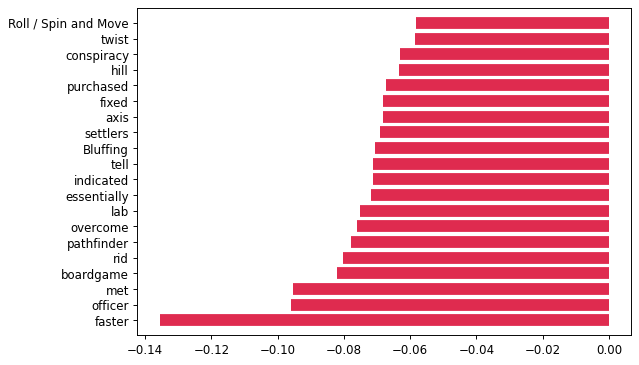

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 5), dpi=85)

plt.hlines(y=df_filter_negative.index.values[:20], xmin=0, xmax=df_filter_negative['score'][:20],
            alpha=0.9, linewidth=10, color = 'crimson')
# plt.grid()
plt.show()

In [31]:
listvar = df_feature.columns.values
wordlist = listvar[282:-1]
df_scoreword = df_score.filter(items=wordlist,axis='index')
df_scoreword_sort = df_scoreword.sort_values('score')
df_scoreword_sort

,score
faster,-0.135580
officer,-0.096002
met,-0.095377
boardgame,-0.082122
rid,-0.080340
...,...
arrive,0.105505
navigate,0.112616
revised,0.119213
dual,0.121451


In [32]:
df_filter = df_scoreword_sort[df_scoreword_sort['score']!=0]
df_filter_positive = df_filter[df_filter['score']>0]
df_filter_negative = df_filter[df_filter['score']<0]

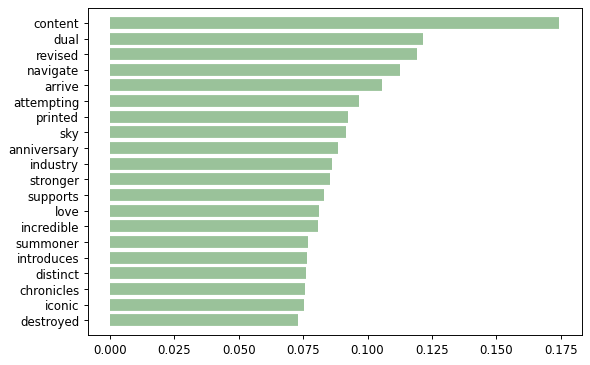

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 5), dpi=85)

plt.hlines(y=df_filter_positive.index.values[-20:], xmin=0, xmax=df_filter_positive['score'][-20:],
            alpha=0.9, linewidth=10, color = 'DarkSeaGreen')
# plt.grid()
plt.show()

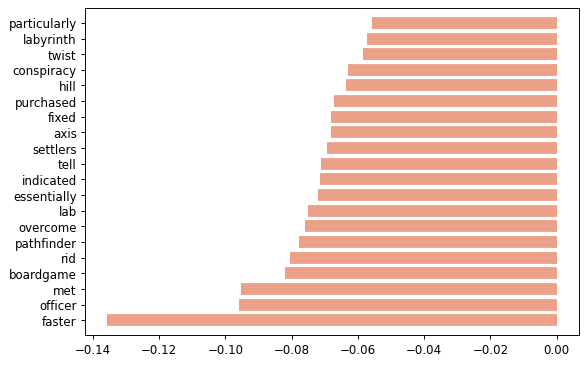

In [34]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 5), dpi=85)

plt.hlines(y=df_filter_negative.index.values[:20], xmin=0, xmax=df_filter_negative['score'][:20],
            alpha=0.9, linewidth=10, color = 'DarkSalmon')
# plt.grid()
plt.show()

In [35]:
nonwordlist = [x for x in listvar if x not in wordlist]

df_scorefeature = df_score.filter(items=nonwordlist,axis='index')
df_scorefeature_sort = df_scorefeature.sort_values('score')
df_scorefeature_sort

,score
Bluffing,-0.070702
Roll / Spin and Move,-0.058334
Area Majority / Influence,-0.057111
Player Elimination,-0.055390
Area Movement,-0.052723
...,...
Increase Value of Unchosen Resources,0.133213
Scenario / Mission / Campaign Game,0.144556
Miniatures,0.185338
Card Play Conflict Resolution,0.204370


In [36]:
df_filter = df_scorefeature_sort[df_scorefeature_sort['score']!=0]
df_filter_positive = df_filter[df_filter['score']>0]
df_filter_negative = df_filter[df_filter['score']<0]

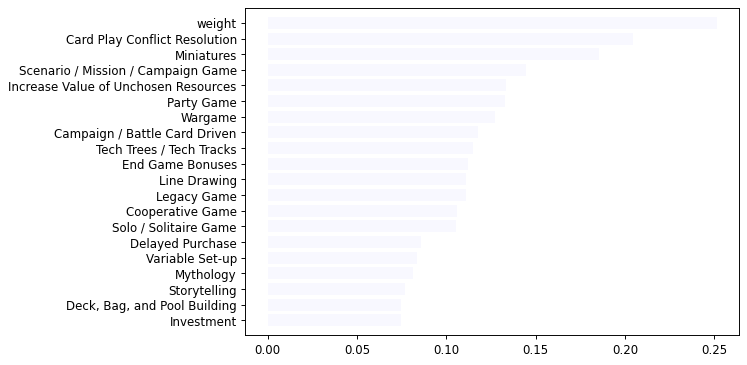

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 5), dpi=85)

plt.hlines(y=df_filter_positive.index.values[-20:], xmin=0, xmax=df_filter_positive['score'][-20:],
            alpha=1, linewidth=10, color = 'ghostwhite')
# plt.grid()
plt.show()

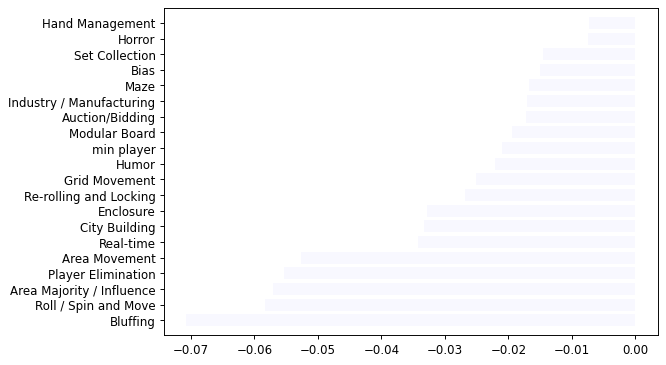

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7.5, 5), dpi=85)

plt.hlines(y=df_filter_negative.index.values[:20], xmin=0, xmax=df_filter_negative['score'][:20],
            alpha=1, linewidth=10, color = 'ghostwhite')

plt.show()

## xgboost

In [39]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [40]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
import pandas as pd
df = pd.read_csv('all_feature.csv')

df_dropname_and_target = df.drop(columns=['id','name','rank','rating','Own'])
df_feature = df_dropname_and_target.copy()

x = df_feature.values
y = df['rating'].to_numpy()

[0.0027777  0.00379609 0.00246508 ... 0.         0.         0.00120604]


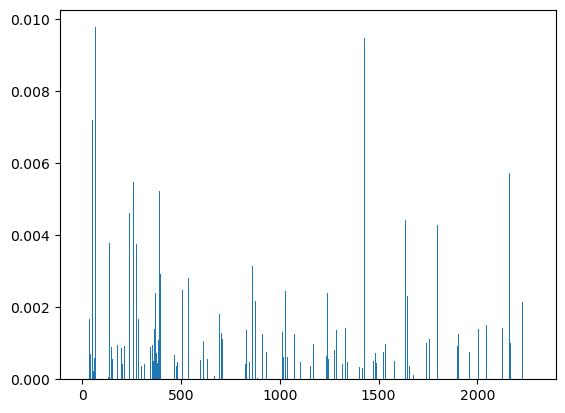

,score
Post-Napoleonic,0.009768
mounted,0.009470
content,0.009372
beware,0.008853
Line of Sight,0.008640
...,...
campaigns,0.000000
tie,0.000000
italy,0.000000
builders,0.000000


In [42]:
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

# fit model no training data
model = XGBRegressor()
model.fit(X_train, y_train)
print(model.feature_importances_)

# plot
import matplotlib.pyplot as plt
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

listvar = df_feature.columns.values
df_score = pd.DataFrame(data =  model.feature_importances_,
                 index = listvar,
                 columns = ['score'])

df_sort = df_score.sort_values('score',ascending=False)
df_sort

In [43]:
df = pd.read_csv('all_feature.csv')

df_dropname_and_target = df.drop(columns=['id','name','rank','rating','Own'])
df_feature = df_dropname_and_target.copy()
# df_feature = df_feature.drop(columns=['ups'])

x = df_feature.values
y = df['rating']


model = XGBRegressor()
model.fit(x, y)

listvar = df_feature.columns.values
df_score = pd.DataFrame(data =  model.feature_importances_,
                 index = listvar,
                 columns = ['score'])

df_sort = df_score.sort_values('score',ascending=True)
df_sort

,score
sheep,0.000000
thousands,0.000000
journeys,0.000000
corrupt,0.000000
h,0.000000
...,...
Campaign / Battle Card Driven,0.008478
Card Play Conflict Resolution,0.011439
compatible,0.012362
Miniatures,0.013363


In [44]:
list(df_sort.index.values[-20:])

['demands',
 'investment',
 'Legacy Game',
 'composed',
 'rogue',
 'sheets',
 'miniature',
 'havoc',
 'weight',
 'conquered',
 'seconds',
 'revised',
 'chapters',
 'Victory Points as a Resource',
 'Solo / Solitaire Game',
 'Campaign / Battle Card Driven',
 'Card Play Conflict Resolution',
 'compatible',
 'Miniatures',
 'Scenario / Mission / Campaign Game']

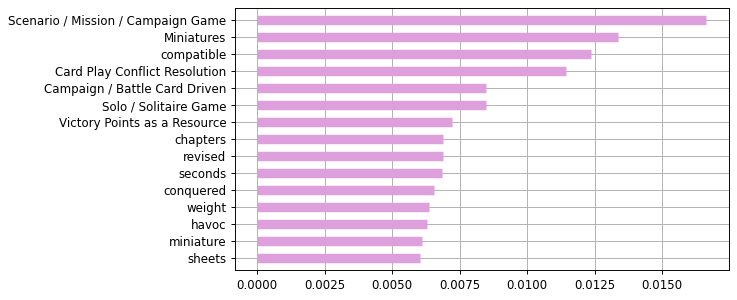

In [45]:
df_filter = df_sort[df_sort['score']!=0]
df_filter_positive = df_filter[df_filter['score']>0]
df_filter_negative = df_filter[df_filter['score']<0]

plt.figure(figsize=(7.5, 4), dpi=85)

plt.hlines(y=df_filter_positive.index.values[-15:], xmin=0, xmax=df_filter_positive['score'][-15:],
            alpha=1, linewidth=8, color = 'plum')
plt.grid()
plt.show()

In [46]:
df_sort[df_sort['score']>0]

,score
format,0.000010
World War II,0.000018
faith,0.000025
Stat Check Resolution,0.000031
American West,0.000055
...,...
Campaign / Battle Card Driven,0.008478
Card Play Conflict Resolution,0.011439
compatible,0.012362
Miniatures,0.013363


## Partial Dependence Plot

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('all_feature.csv')

df_dropname_and_target = df.drop(columns=['id','name','rank','rating','Own'])
df_feature = df_dropname_and_target.copy()

x = df_feature.values
y = df['rating'].to_numpy()

model = XGBRegressor()
model.fit(x, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
listvar = df_feature.columns.values
df_score = pd.DataFrame(data =  model.feature_importances_,
                 index = listvar,
                 columns = ['score'])

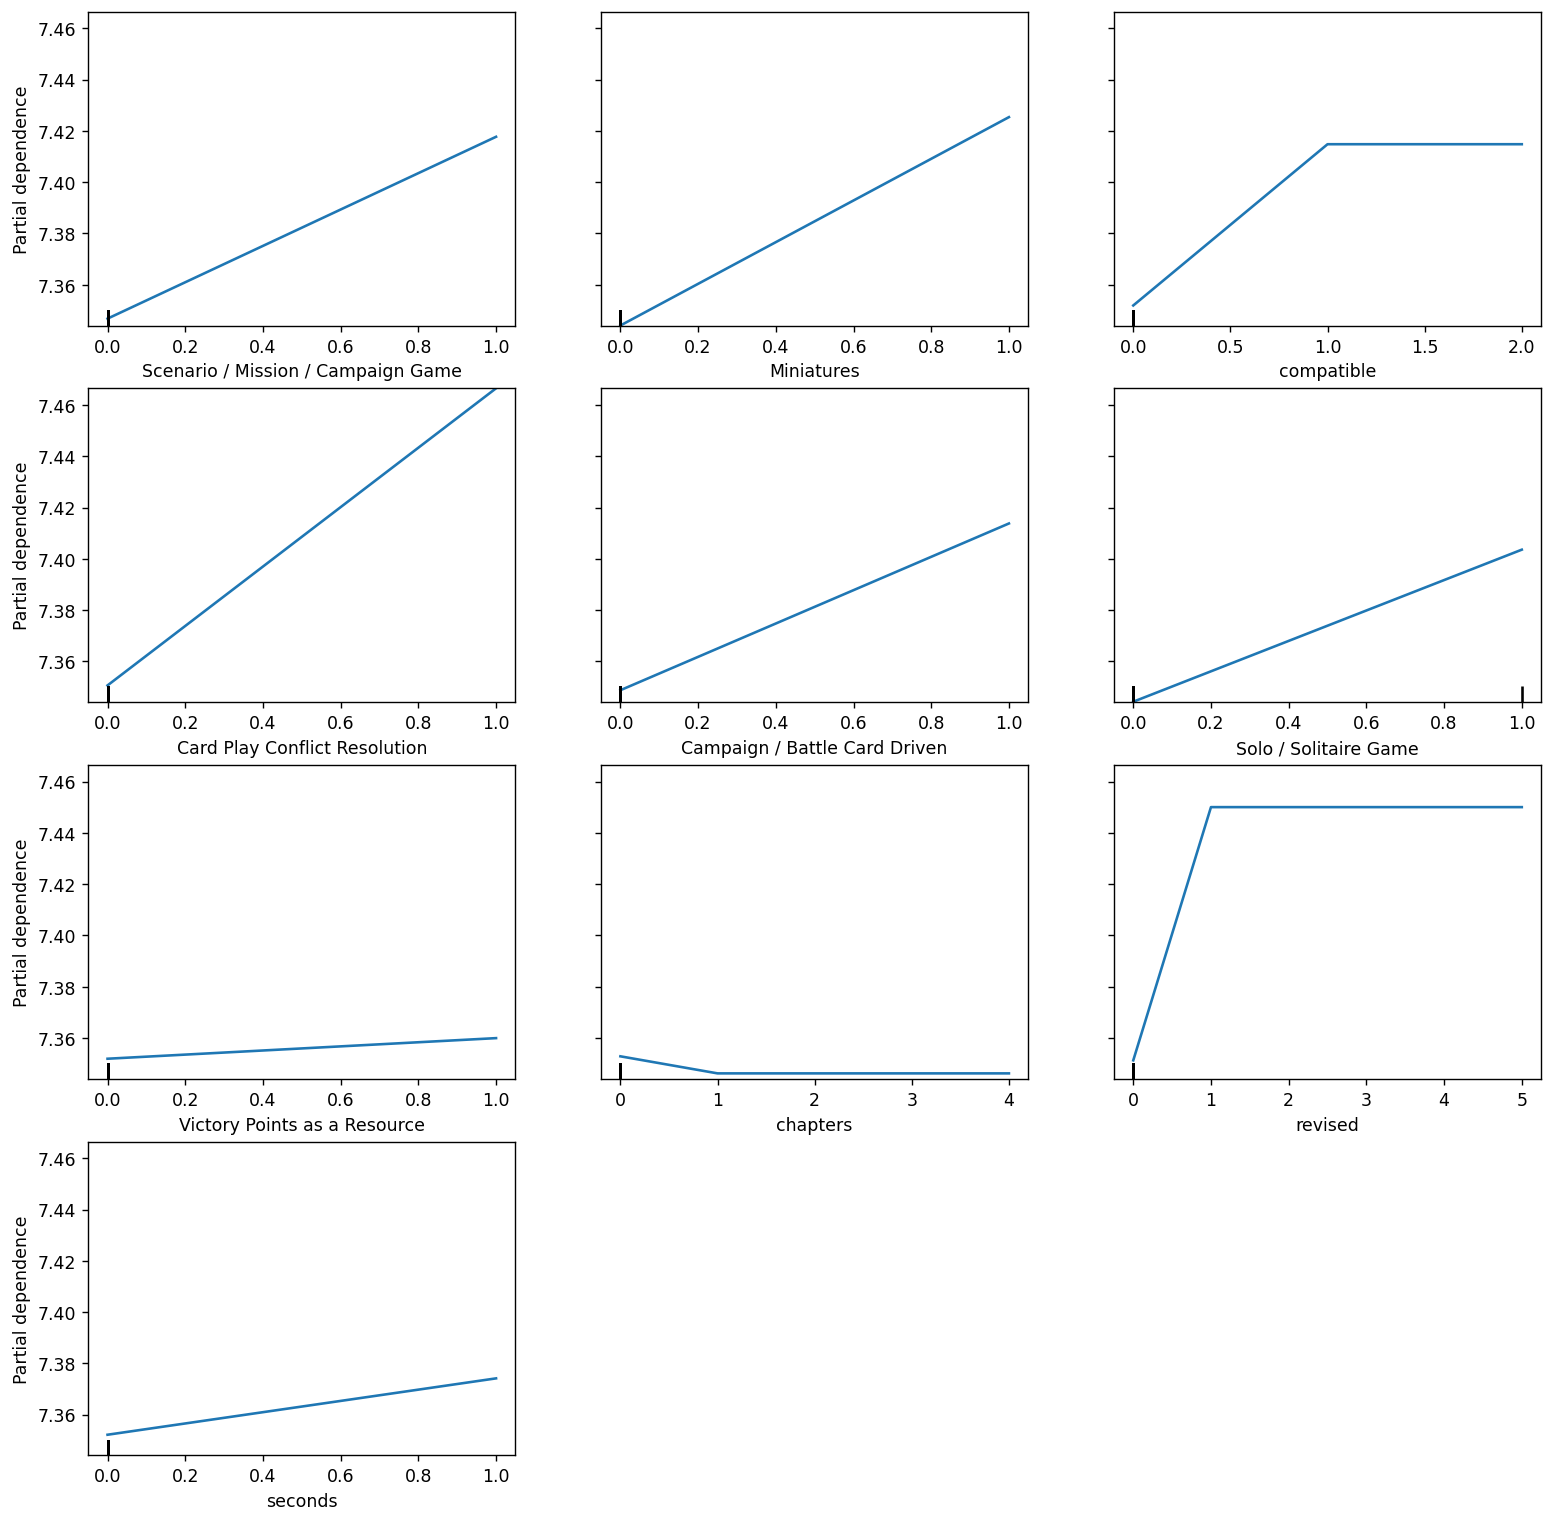

In [50]:
from sklearn.inspection import plot_partial_dependence


df_sort = df_score.sort_values('score',ascending=False)


fig, ax = plt.subplots(figsize=(15, 15),dpi=125)
plot_partial_dependence(estimator = model,\
                        X = df_feature,\
                        features = df_sort.index.values[0:10],\
                        grid_resolution=20,ax=ax)